In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import ShuffleSplit
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
import copy
pd.set_option('display.max_columns', None)

In [2]:
avg_df = pd.read_csv('new_train_df.csv')
worlds_test = pd.read_csv('worlds_test_df.csv')

In [3]:
#len(avg_df.columns.tolist()), len(worlds_test.columns.tolist())

In [4]:
worlds_test.drop('Unnamed: 0', axis = 1, inplace = True)
avg_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
#len(avg_df.columns.tolist()), len(worlds_test.columns.tolist())

In [6]:
avg_df.drop(['team', 'opp_team'], axis = 1, inplace = True)

### Entrenando el modelo con el nuevo conjunto de datos

In [7]:
X = copy.copy(avg_df)

In [8]:
Y = avg_df['result']
X.drop('result', axis = 1, inplace = True)

In [9]:
clf = ExtraTreesClassifier(n_estimators = 100, random_state = 43)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 43)
clf.fit(Xtrain, Ytrain)

ExtraTreesClassifier(random_state=43)

In [10]:
Ypred = clf.predict(Xtest)
metrics.f1_score(Ytest, Ypred, average='macro')

0.6056278216741735

### Extraccion de atributos importantes

<AxesSubplot:>

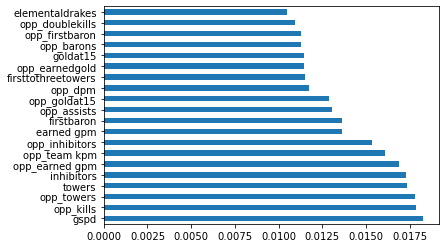

In [11]:
feat_importances = pd.Series(clf.feature_importances_, index = X.columns)
feat_importances.nlargest(20).plot(kind = 'barh')

In [12]:
feat_importances.sort_values(ascending = False, inplace = True)
f_i_l = feat_importances.tolist()
f_i_l_n = list(feat_importances.index)
feat_importance_list = [[f_i_l_n[i], f_i_l[i]] for i in range(len(f_i_l)) if i < 20]
feature_list = [x[0] for x in feat_importance_list]

### entrenamiento con los 20 atributos mas importantes

In [13]:
X = avg_df[feature_list]
Y = avg_df['result']

In [14]:
clf_importance = ExtraTreesClassifier(n_estimators = 100, random_state = 43)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 43)
clf_importance.fit(Xtrain, Ytrain)

ExtraTreesClassifier(random_state=43)

In [15]:
Ypred = clf_importance.predict(Xtest)
metrics.f1_score(Ytest, Ypred, average='macro')

0.6113158193338787

In [16]:
feature_list_worlds = ['towers',
 'opp_towers',
 'opp_inhibitors',
 'inhibitors',
 'firstbaron',
 'opp_firstbaron',
 'opp_assists',
 'opp_earnedgpm',
 'earnedgpm',
 'kills',
 'opp_earnedgold',
 'barons',
 'firsttothreetowers',
 'opp_team kpm',
 'opp_elementaldrakes',
 'opp_barons',
 'opp_doublekills',
 'opp_dragons',
 'gspd',
 'dragons']

In [17]:
Xtest = worlds_test[feature_list_worlds]
Ytest = worlds_test['result']

In [18]:
Ypred = clf_importance.predict(Xtest)
#metrics.f1_score(Ytest, Ypred, average = 'macro')
metrics.accuracy_score(Ytest, Ypred)

0.5087719298245614

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
confusion_matrix(Ytest, Ypred)

array([[ 0, 56],
       [ 0, 58]], dtype=int64)

In [21]:
Ypred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [22]:
Ytest

0      1
1      1
2      1
3      0
4      1
      ..
109    1
110    1
111    0
112    0
113    1
Name: result, Length: 114, dtype: int64

In [27]:
sum([1 for y in Ytest if y == 1])

58